## Board game recommendation engine 

#### John Burt


#### My method: 


#### Workgroup members: 


## load data from csv file

- Set up plot environment.
- boardgame rating data from csv into pandas dataframe


In [22]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

from datetime import datetime

pd.options.display.max_rows = 100

# load the boardgame rating data, set boardgame ID as index
rawdata = pd.read_csv('boardgame-ratings.csv')

# name the user column
rawdata=rawdata.rename(columns = {"Compiled from boardgamegeek.com by Matt Borthwick":'userID'})

# dict to get boardgame names from id
gameid = {
    11:"Bohnanza",
    68448:"7 Wonders",
    39856:"Dixit",
    40692:"Small World",
    31260:"Agricola",
    148228:"Splendor",
    13:"Catan",
    178900:"Codenames",
    34635:"Stone Age",
    28143:"Race for the Galaxy",
    129622:"Love Letter",
    14996:"Ticket to Ride: Europe",
    3076:"Puerto Rico",
    30549:"Pandemic",
    65244:"Forbidden Island",
    478:"Citadels",
    15987:"Arkham Horror",
    110327:"Lords of Waterdeep",
    36218:"Dominion",
    2651:"Power Grid",
    9209:"Ticket to Ride",
    103:"Titan",
    822:"Carcassonne",
    2163:"Space Hulk",
    1927:"Munchkin",
    70323:"King of Tokyo",
    33154:"Wasabi", 
    197376:"Charterstone"
    }
# look at what we've got:
#rawdata.shape
#print(rawdata.head())
rawdata.describe()

,userID,gameID,rating
count,834415.000000,834415.000000,834415.000000
mean,68321.842799,38646.073668,7.503287
std,39752.688482,46730.664254,1.427909
min,1.000000,11.000000,1.000000
25%,34087.000000,2651.000000,7.000000
50%,68166.000000,30549.000000,7.800000
75%,101983.000000,40692.000000,8.130000
max,154735.000000,197376.000000,10.000000


- plot rating histogram for all games.
- try to fit it to normal distribution.

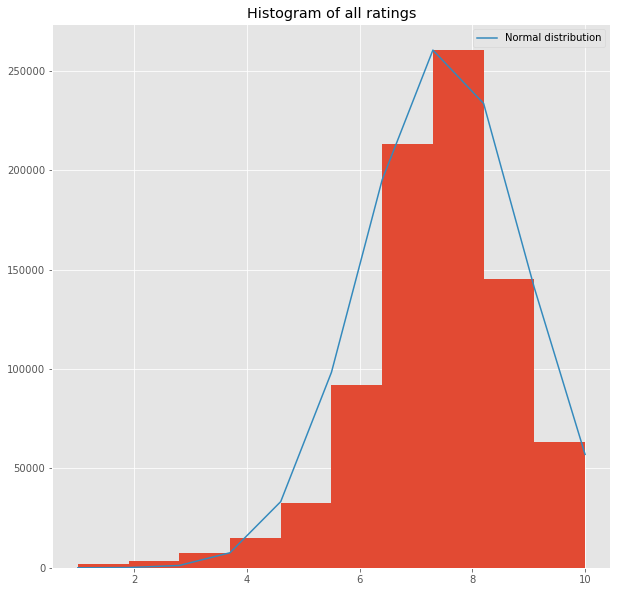

In [87]:
from scipy import stats  

fig = plt.figure(figsize=(10, 10))

#counts, division = np.histogram(rawdata.rating)
#print(counts,division)

#counts, bins, patches = plt.hist(rawdata.rating, bins=10, normed=True)
counts, bins, patches = plt.hist(rawdata.rating, bins=10)

# get mean and standard deviation 
m, s = stats.norm.fit(rawdata.rating)  

# now get theoretical values in our interval
#pdf_g = stats.norm.pdf(lnspc, m, s)   
pdf_g = stats.norm.pdf(bins, m, s)   

# range the distribution curve to the actual histogram bin counts
pdf_g = pdf_g*(counts.max()/pdf_g.max())

#ax = plt.plot(lnspc, pdf_g, label="Norm") # plot it
ax = plt.plot(bins, pdf_g, label="Normal distribution") # plot it
axt = plt.title('Histogram of all ratings')
axl = plt.legend(handles=ax)


rating histograms by game

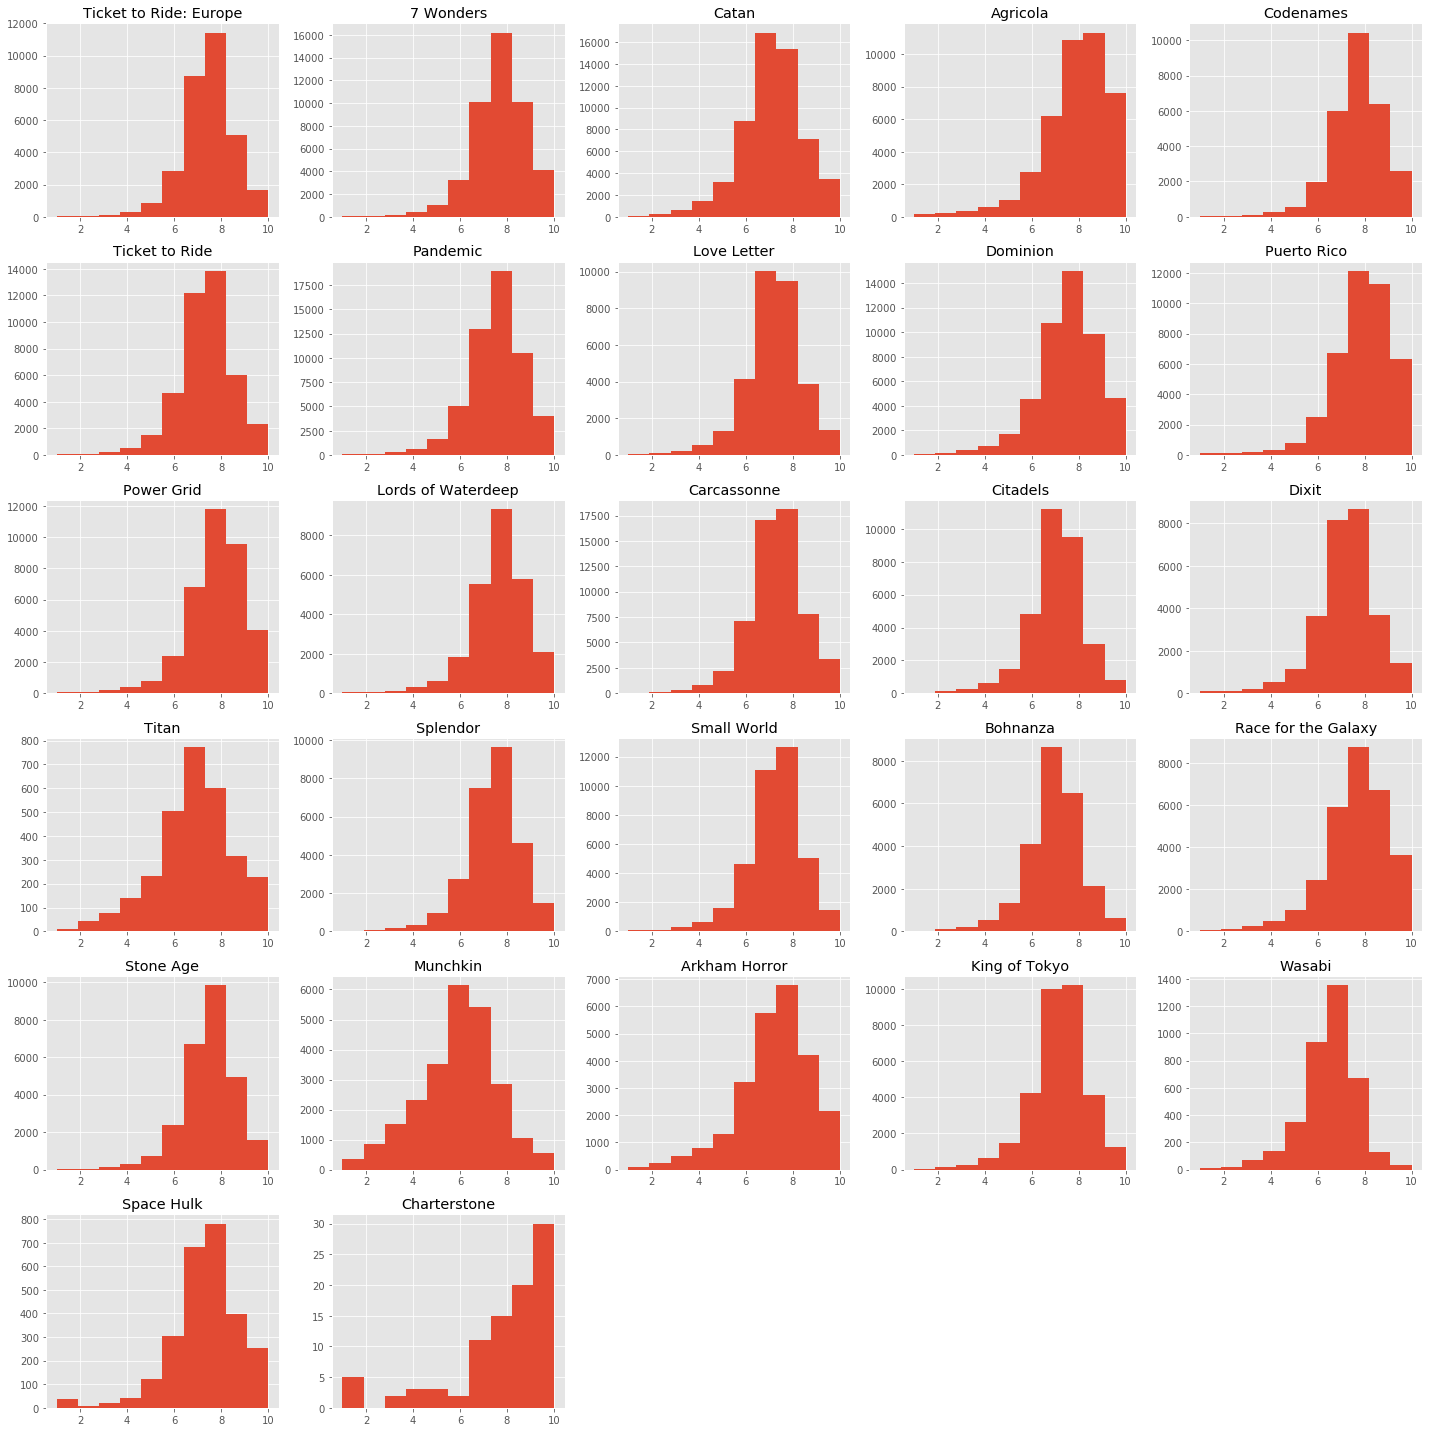

In [26]:
# get a list if the game IDs
gameidnums = rawdata.gameID.unique()
#print([gameid[id] for id in gameidnums])

# get # rows and cols for squarish plot grid
numgames = gameidnums.shape[0]
numcols = int(np.sqrt(numgames))
numrows = numcols+1

# plot each game's rating histogram in a separate subplot
plt.figure(figsize=(20, 20))
plotnum = 1
for id in gameidnums:
    plt.subplot(numrows, numcols, plotnum)
    plotnum += 1
    rawdata.rating[rawdata.gameID==id].hist()
    plt.title(gameid[id])
    plt.tight_layout()

histogram of # games users rated.

note: his take a while. Need to do this more efficiently than a for loop

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DED8CA7B8>]], dtype=object)

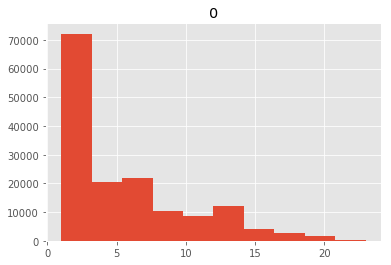

In [88]:
useridnums = rawdata.userID.unique()
#print(useridnums.shape)

ratingcounts = np.array([rawdata.userID[rawdata.userID == id].count() for id in useridnums])

counts = pd.DataFrame(ratingcounts)

fig = plt.figure(figsize=(10, 10))

ax1 = counts.hist()